In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

#print(sys.path)

In [2]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image


In [3]:
# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core.schmidt_solve import compute_schmidt_states
from core.schmidt_solve import compute_schmidt_states_all_time
from core.schmidt_solve import compute_schmidt_full
from core.schmidt_solve import compute_schmidt_states_new
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot

In [4]:
# Setting parameters for simulation TODO make a config file for this.

d1 = 10; d2 = 200; E_spacing = 1.0; E_int = 0.055; E_int2 = 0; E_env = 1; E_env2 = 0; w = [0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0]; envi=[0]; tmax = 15; ind_nb = 100; log = 0
env_sys=0
# Running the simulation and running the core functions
result, tlist, H_list, ket_list, info = time_evo(d1,d2,E_spacing, E_int, E_int2, E_env, E_env2,w,envi, tmax, ind_nb,log)
eigen = eig(H_list)
s_list = compute_schmidt_states_all_time(result, ind_nb)
ss_list = s_list[0]
se_list= s_list[1]
sv_list = s_list[2]

In [5]:
x,y=state_distribution_eig_tot(result, eigen, info)

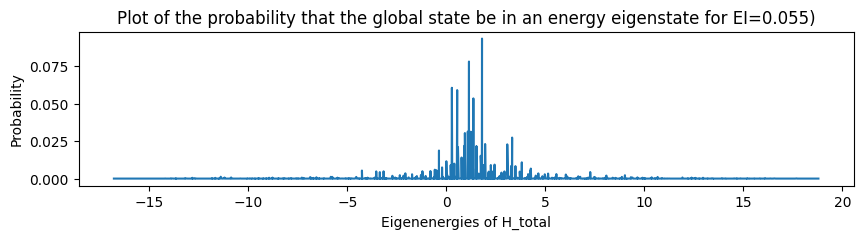

In [9]:
plot_basic(x,y,"Eigenenergies of H_total", "Probability", "Plot of the probability that the global state be in an energy eigenstate for EI=0.055)",(10,2))

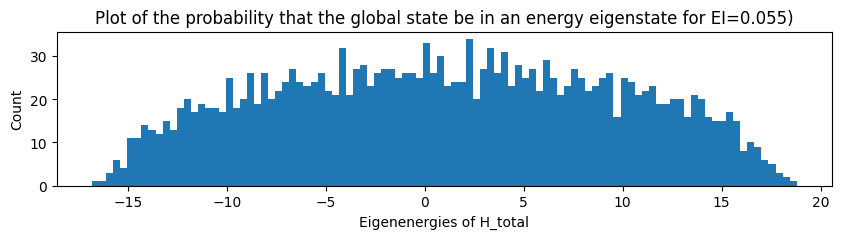

In [10]:
plot_with_binning(x,"Eigenenergies of H_total", "Plot of the probability that the global state be in an energy eigenstate for EI=0.055)",(10,2))

In [9]:
#testing the that there is no difference between compute_schmidt_full and one of the outputes of compute_schmidt_states_all_time. to do that first identify the needs of compute_schmidt_new
#TODO se and b are not the same. why???? This is a huge problem!
idx = 4
ss,se,sv=compute_schmidt_states_new(result, idx)
a = ss[1] #schmidt 1 on system 1
a = np.squeeze(a)
b = se[0] #schmidt 1 on system 2
ss=ss_list[idx]
se=se_list[idx]

In [10]:
print(se)
print(b)

(array([[ 8.35596504e-02+0.00000000e+00j],
       [-6.14294095e-02+6.97723533e-02j],
       [ 1.13856158e-01+1.50562153e-02j],
       [-3.63169582e-02+6.95173792e-02j],
       [ 4.55412655e-02-1.13401433e-01j],
       [-1.60954575e-02+2.93016511e-02j],
       [-1.92206795e-02+4.35541648e-02j],
       [ 9.02674844e-02-2.29649098e-02j],
       [ 5.26175071e-02-2.35452754e-02j],
       [ 3.97791514e-02+3.90018413e-02j],
       [ 1.13378287e-02+4.07155123e-02j],
       [ 9.18833304e-02+2.46147541e-04j],
       [-2.40488571e-02-6.01679212e-02j],
       [-1.87437000e-02-4.07433841e-02j],
       [-1.48232923e-02+5.90814034e-02j],
       [ 1.87057352e-02+1.15037697e-02j],
       [ 1.46385153e-01+2.87613983e-02j],
       [-5.07849010e-02-8.00652864e-03j],
       [-4.86900412e-02-5.72275945e-03j],
       [-5.31899968e-02+5.07686774e-02j],
       [ 5.40644668e-02-1.09163211e-01j],
       [-3.02041761e-02+5.69974963e-02j],
       [-4.40588281e-02+1.50815942e-03j],
       [ 1.84541560e-02+4.4845055

[ 0.05439894-6.34268874e-02j  0.01296975+9.20518283e-02j
  0.08555114-7.66219041e-02j  0.0291249 +7.28239482e-02j
 -0.05643038-1.08395127e-01j  0.01176329+3.12933772e-02j
  0.02054724+4.29442732e-02j  0.0413341 -8.34691431e-02j
  0.01638271-5.52683358e-02j  0.05550178-4.80385887e-03j
  0.03828671+1.79004782e-02j  0.06000466-6.95848230e-02j
 -0.0613274 -2.09159233e-02j -0.04312923-1.22971138e-02j
  0.03519615+4.97149191e-02j  0.02090986-6.70962156e-03j
  0.11713122-9.23910629e-02j -0.0391394 +3.33364426e-02j
 -0.03604208+3.32330937e-02j  0.00390882+7.34258504e-02j
 -0.04766455-1.12105594e-01j  0.02360109+6.00332872e-02j
 -0.02753836+3.44251872e-02j  0.04605415+1.51871624e-02j
  0.00805872+6.72600288e-02j -0.02738936+2.32137244e-02j
 -0.06657435+6.62831875e-04j -0.04519306-5.46600629e-02j
 -0.00461925+4.37898523e-02j -0.07707021+5.74238572e-02j
 -0.01928936-4.83483696e-02j -0.04719966-2.10182873e-02j
 -0.00268052+2.07755051e-02j -0.08728204-9.50141543e-03j
  0.02487213+1.25485009e-03j -0

SyntaxError: invalid syntax (2195115835.py, line 3)

In [5]:
path = gif_distribution_eig_total(result,eigen, info)
display_gif(path)

[10, 200, 1.0, 0.055, 0, 1, 0, [0, 0, 0, 0.5477225575051661, 0, 0, 0, 0.8366600265340756, 0, 0], [0], 15, 100, 0]
../outputs/gifs/distrib_EI_[10, 200, 1.0, 0.055, 0, 1, 0, [0, 0, 0, 0.5477225575051661, 0, 0, 0, 0.8366600265340756, 0, 0], [0], 15, 100, 0].gif


In [ ]:
gif_path = collapse_gif(eigen, s_list, info,env_sys)

display_gif(gif_path)


/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


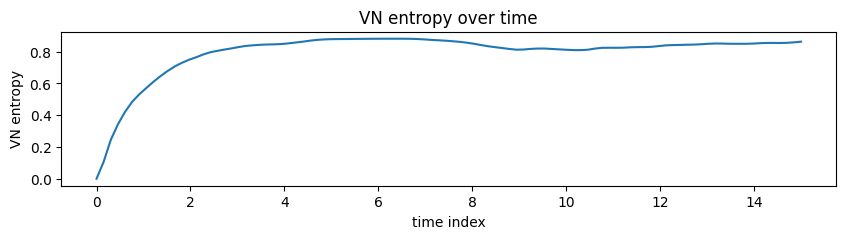

In [10]:
plot_VN(result,tlist,log=0)

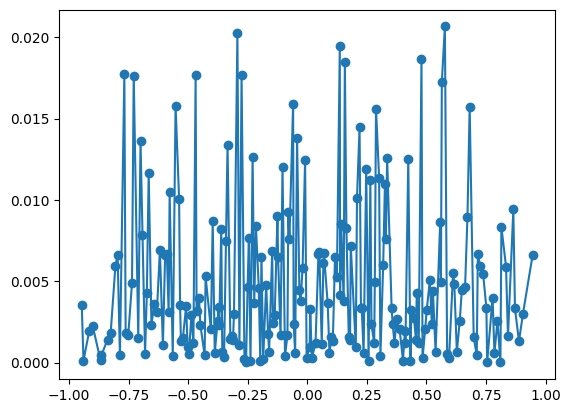

In [7]:

eigenenergies_system_2, eigenstates_system_2 = H_list[7].eigenstates() 
eigenenergies_system_total, eigenstates_system_total = H_list[1].eigenstates() 
eigenenergies_system_1, eigenstates_system_1 = H_list[6].eigenstates() 

# Plot 2: Distribution of the Environment state over the environment energy eigenstates
time_index = 10  # Define the time index
s0 = compute_schmidt_states(result, time_index, 1)[0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_2]
plt.plot(eigenenergies_system_2, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_2}')

    


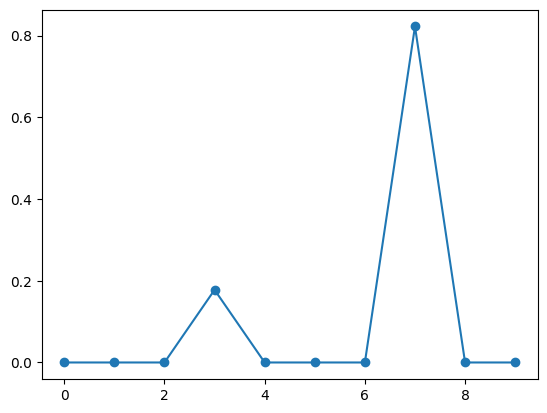

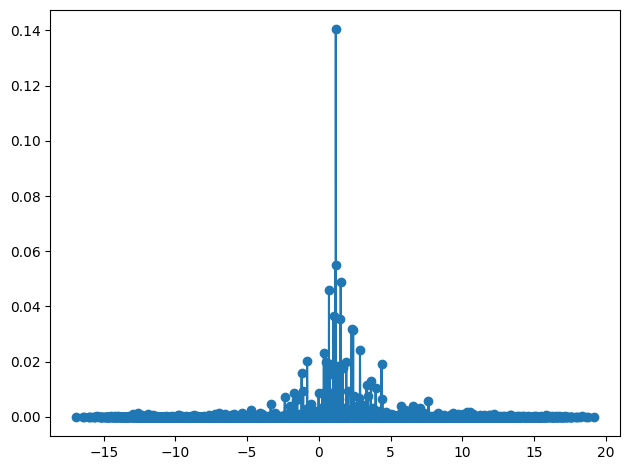

In [8]:
    # Plot 3: Distribution of the System state over the system energy eigenstates
    s0 = compute_schmidt_states(result, time_index, 0)[0]
    schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_1]
    plt.plot(eigenenergies_system_1, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_1}')
    #axes[1, 0].set_title("Distribution of the System state over the system energy eigenstates")
    #axes[1, 0].set_xlabel("Energy Eigenstates")
    #axes[1, 0].set_ylabel("Schmidt Coefficients")
    plt.show()
    # Plot 4: Distribution of the state over the energy eigenstates
    s0 = result.states[0]
    schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_total]
    plt.plot(eigenenergies_system_total, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_total}')
    #axes[1, 1].set_title("Distribution of the state over the energy eigenstates")
    #axes[1, 1].set_xlabel("Energy Eigenstates")
    #axes[1, 1].set_ylabel("Schmidt Coefficients")
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()